# Project 4- Credit risk classification

#### About Dataset
- This dataset consists of 20 features of the customers.
- It could be used to predict if the customer could be given credit.
- Many features require data cleaning.
- This is a great dataset for practicing data cleaning and feature engineering and building a binary classification model.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
data = pd.read_csv("credit_customers.csv")
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
description_data = data.describe().round(2)
description_data

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


## Identify features and labels

### Label:

- class
### Features:

- the remaining columns are the features



### ●	Encoding data Categorical to numerical/ordinal

In [5]:
from sklearn.preprocessing import LabelEncoder

def Label_Encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

data = Label_Encoder(data)

In [6]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


# Calculate Central/Dispersion measures¶
## Mean, STD, …

#### library for dispersion measures

#### I have developed a library for dispersion measures:
class DispersionMeasures:
    def __init__(self, data):
        self.data = data
    
    def calculate_mean(self):
        return round(self.data.mean(), 2)
    
    def calculate_median(self):
        return round(self.data.median(), 2)
    
    def calculate_mode(self):
        return round(self.data.mode().iloc[0], 2)
    
    def calculate_standard_deviation(self):
        return round(self.data.std(), 2)
    
    def calculate_variance(self):
        return round(self.data.var(), 2)
    
    def calculate_range(self):
        return round(self.data.max() - self.data.min(), 2)
    
    def calculate_quartiles(self):
        first_quartile = round(self.data.quantile(0.25), 2)
        third_quartile = round(self.data.quantile(0.75), 2)
        iqr = round(third_quartile - first_quartile, 2)
        
        return first_quartile, third_quartile, iqr

In [7]:
from dispersion_measures import DispersionMeasures

# Select numeric columns from the DataFrame excluding 'age'
numeric_columns = data.select_dtypes(include=['int64', 'float64']).drop('age', axis=1)

dm = DispersionMeasures(numeric_columns)

mean = dm.calculate_mean()
median = dm.calculate_median()
std_dev = dm.calculate_standard_deviation()
variance = dm.calculate_variance()
range_values = dm.calculate_range()
quartiles = dm.calculate_quartiles()

print("Mean:\n", mean)
print()
print("Median:\n", median)
print()
print("Standard Deviation:\n", std_dev)
print()
print("Variance:\n", variance)
print()
print("Range:\n", range_values)
print()
print("First Quartile:\n", quartiles[0])

Mean:
 duration                    20.90
credit_amount             3271.26
installment_commitment       2.97
residence_since              2.84
existing_credits             1.41
num_dependents               1.16
dtype: float64

Median:
 duration                    18.0
credit_amount             2319.5
installment_commitment       3.0
residence_since              3.0
existing_credits             1.0
num_dependents               1.0
dtype: float64

Standard Deviation:
 duration                    12.06
credit_amount             2822.74
installment_commitment       1.12
residence_since              1.10
existing_credits             0.58
num_dependents               0.36
dtype: float64

Variance:
 duration                      145.42
credit_amount             7967843.47
installment_commitment          1.25
residence_since                 1.22
existing_credits                0.33
num_dependents                  0.13
dtype: float64

Range:
 duration                     68.0
credit_amount     

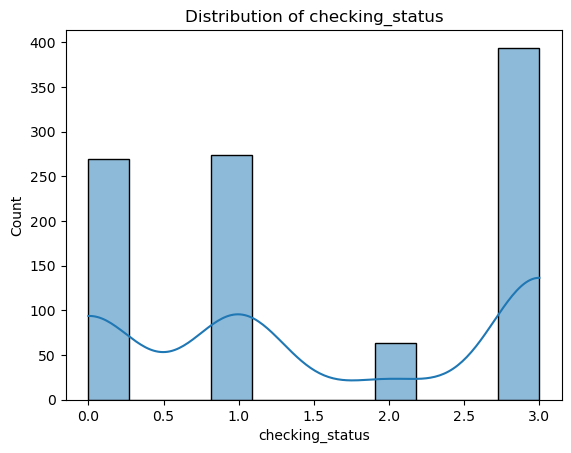

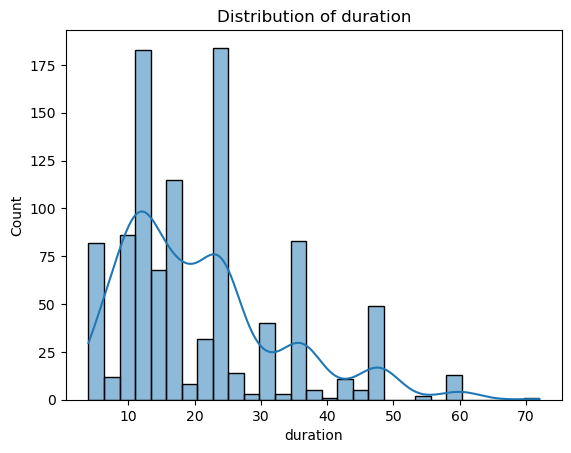

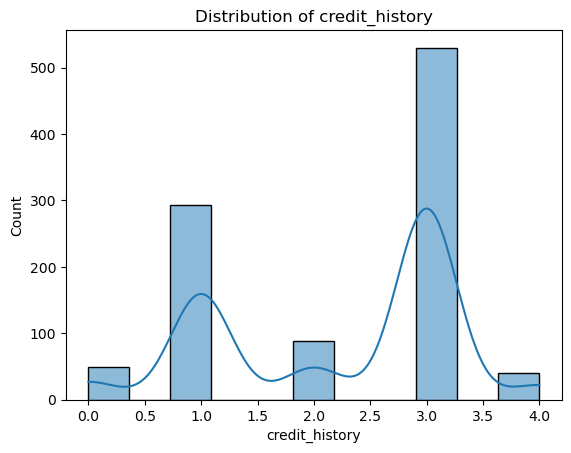

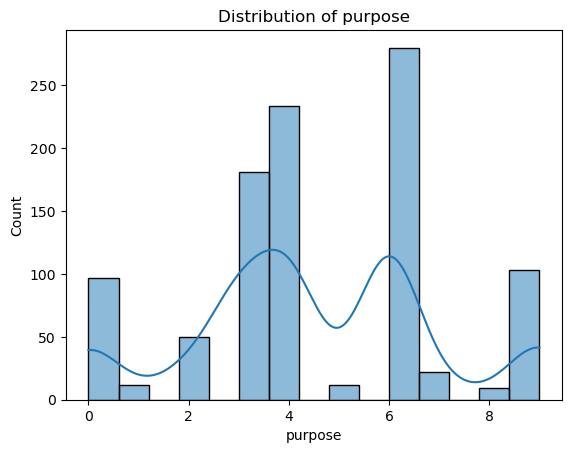

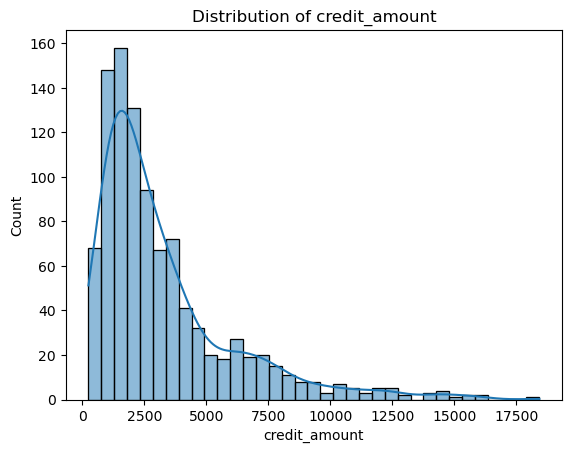

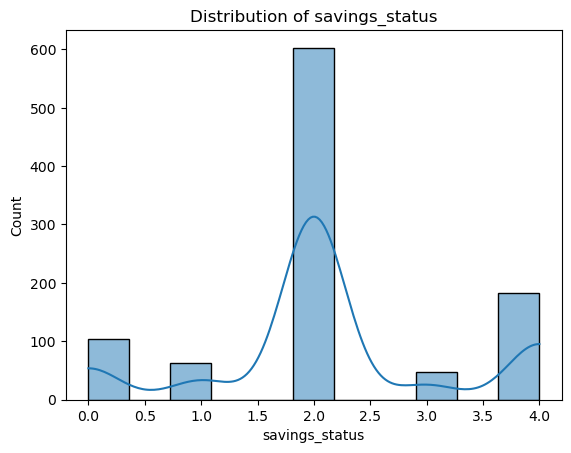

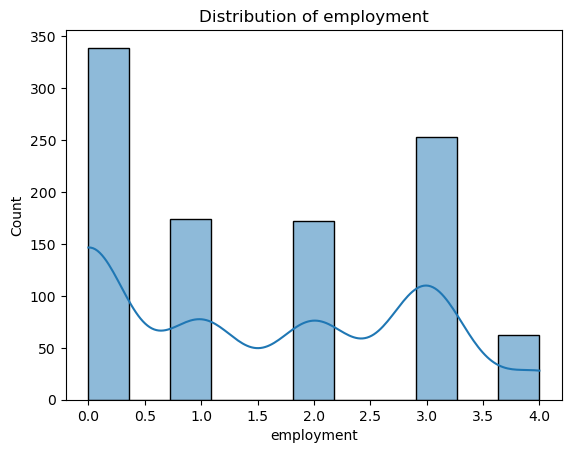

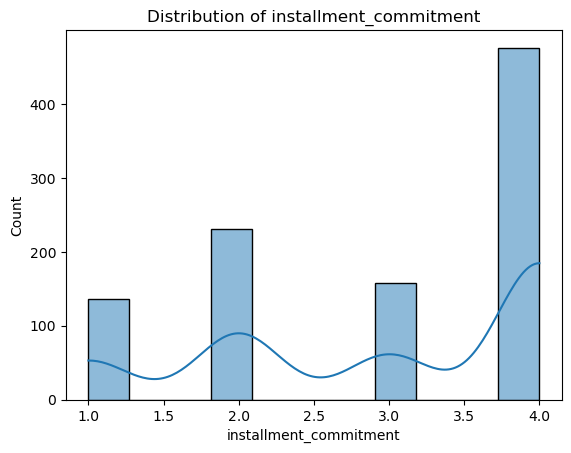

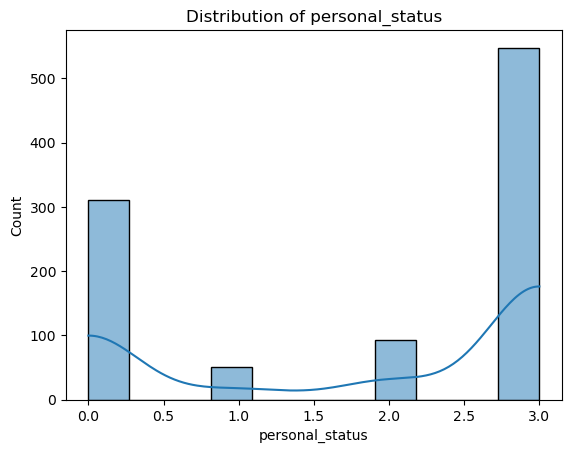

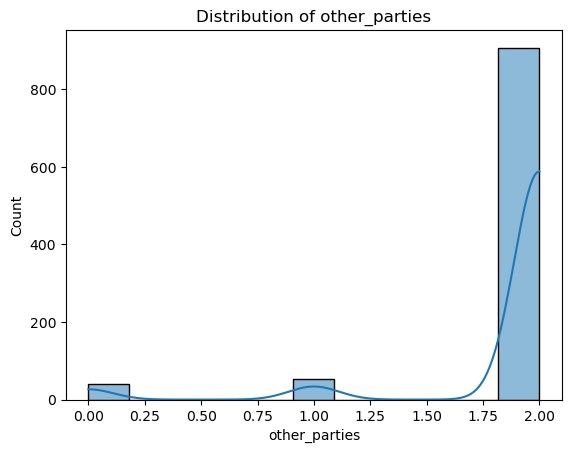

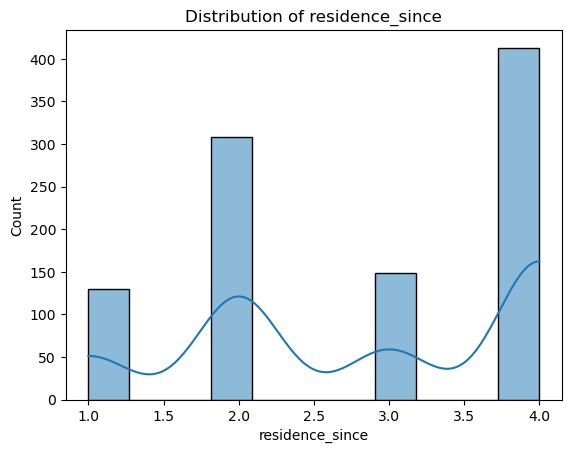

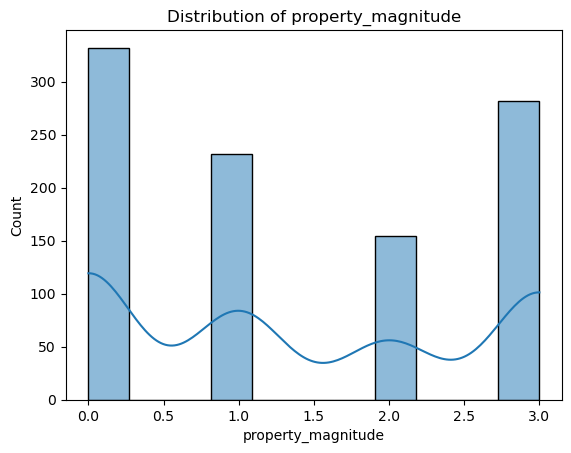

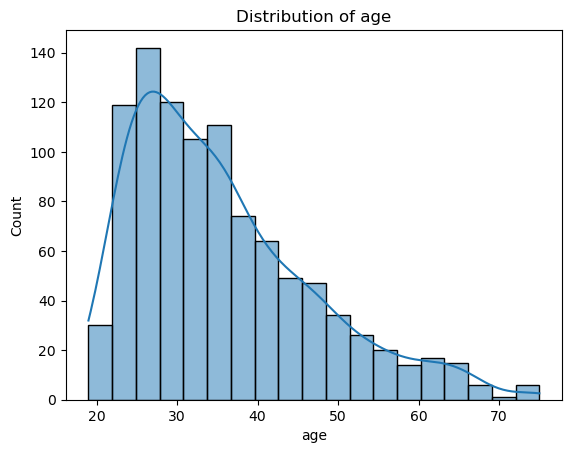

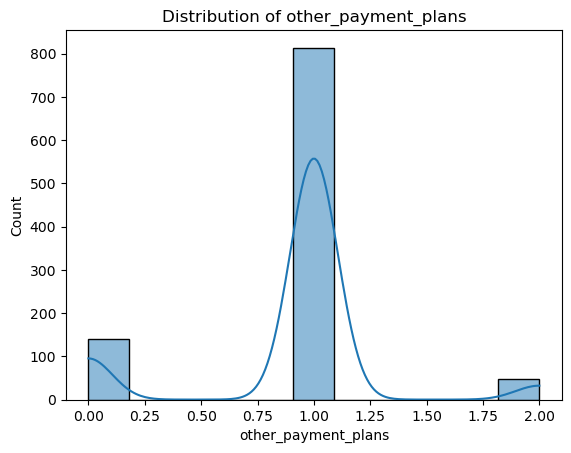

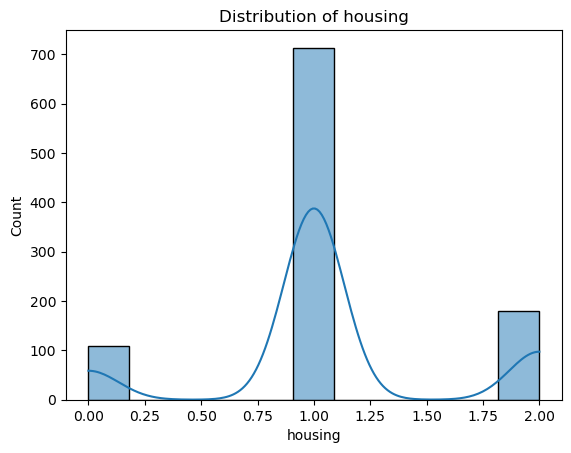

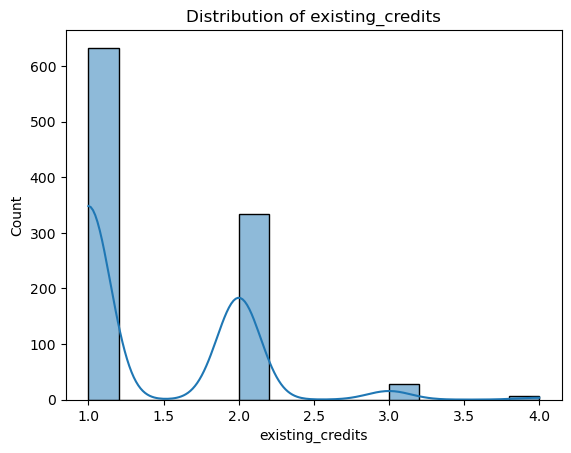

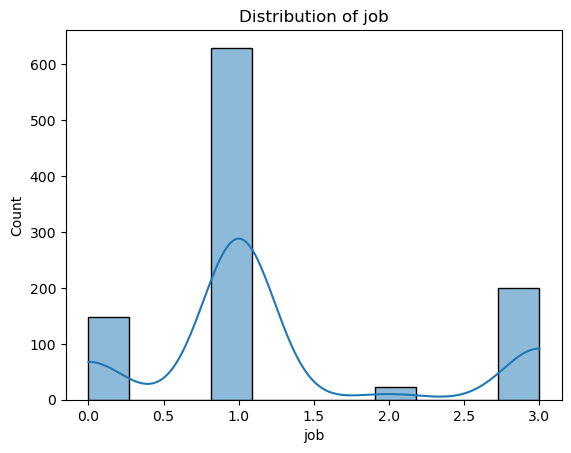

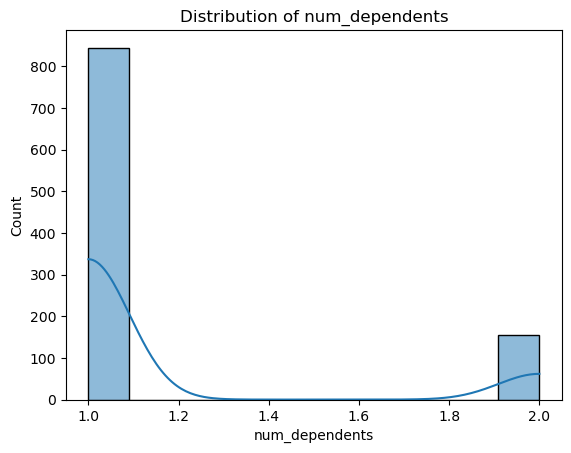

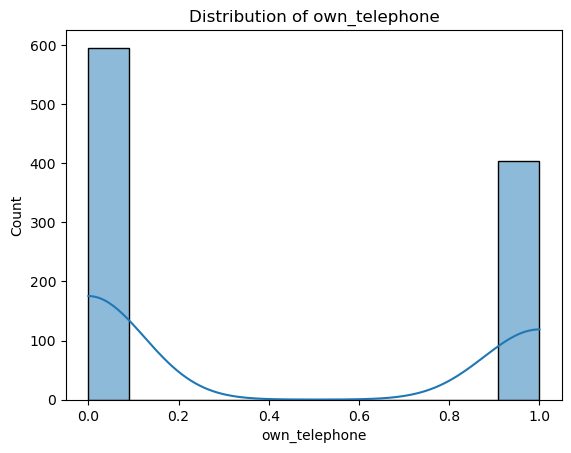

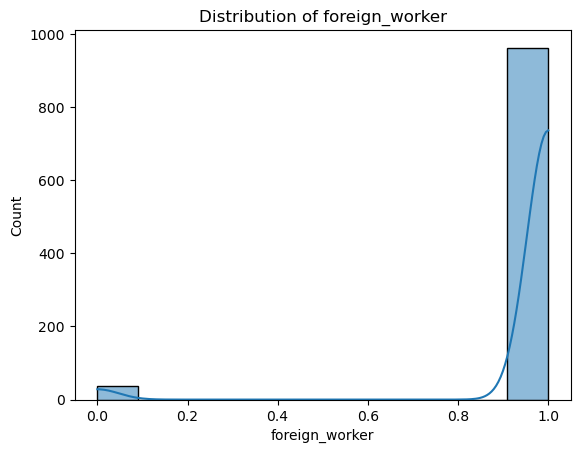

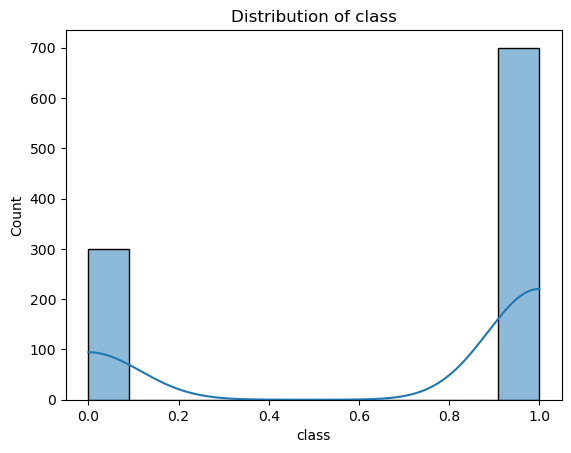

In [8]:
def plot_distribution(data):
    for column in data.columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(data)

## Analyze relationships between features
### Correlation (Heatmap) and Pair plot

In [9]:
description_data = data.describe().round(2)
description_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.58,20.90,2.22,4.48,3271.26,2.14,1.52,2.97,1.88,1.87,...,1.39,35.55,0.91,1.07,1.41,1.27,1.16,0.40,0.96,0.70
std,1.25,12.06,1.06,2.42,2822.74,1.11,1.34,1.12,1.35,0.45,...,1.21,11.38,0.42,0.53,0.58,0.95,0.36,0.49,0.19,0.46
min,0.00,4.00,0.00,0.00,250.00,0.00,0.00,1.00,0.00,0.00,...,0.00,19.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,12.00,1.00,3.00,1365.50,2.00,0.00,2.00,0.00,2.00,...,0.00,27.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
50%,1.00,18.00,3.00,4.00,2319.50,2.00,1.00,3.00,3.00,2.00,...,1.00,33.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
75%,3.00,24.00,3.00,6.00,3972.25,2.00,3.00,4.00,3.00,2.00,...,3.00,42.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,3.00,72.00,4.00,9.00,18424.00,4.00,4.00,4.00,3.00,2.00,...,3.00,75.00,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00


In [10]:
correlation_matrix = data.corr()
correlation_matrix

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
checking_status,1.000000,-0.096005,-0.110683,0.091150,-0.092638,0.097452,-0.030032,0.029780,0.049073,0.084286,...,-0.019556,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.014658,0.302406
duration,-0.096005,1.000000,0.029430,-0.002025,0.624984,0.020843,0.003824,0.074749,0.099678,-0.006711,...,-0.163388,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196,-0.214927
credit_history,-0.110683,0.029430,1.000000,-0.020981,0.029050,-0.031958,-0.088158,-0.059779,-0.080282,0.011296,...,-0.040035,-0.157261,0.040499,0.084026,-0.387820,-0.013921,-0.070008,-0.039237,0.000513,-0.097054
purpose,0.091150,-0.002025,-0.020981,1.000000,0.052295,0.085496,0.079626,0.016287,0.053269,-0.020563,...,-0.025888,0.033211,0.026999,-0.063321,-0.022895,-0.072347,0.025098,0.013023,0.008556,0.138152
credit_amount,-0.092638,0.624984,0.029050,0.052295,1.000000,0.070127,0.038756,-0.271316,0.114810,-0.037921,...,-0.139859,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.050050,-0.154739
savings_status,0.097452,0.020843,-0.031958,0.085496,0.070127,1.000000,0.056865,0.032940,0.035129,0.031213,...,0.040929,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.012566,0.103133
employment,-0.030032,0.003824,-0.088158,0.079626,0.038756,0.056865,1.000000,0.074664,0.048533,0.007275,...,-0.022536,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.064760,-0.008932
installment_commitment,0.029780,0.074749,-0.059779,0.016287,-0.271316,0.032940,0.074664,1.000000,0.118367,0.014835,...,-0.018899,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024,-0.072404
personal_status,0.049073,0.099678,-0.080282,0.053269,0.114810,0.035129,0.048533,0.118367,1.000000,-0.022214,...,0.015354,0.177153,0.006637,-0.245949,0.112438,-0.040375,0.253574,0.078919,-0.049099,0.089535
other_parties,0.084286,-0.006711,0.011296,-0.020563,-0.037921,0.031213,0.007275,0.014835,-0.022214,1.000000,...,-0.108191,0.028294,0.051581,-0.061302,0.017662,-0.014927,0.010990,0.050996,0.107639,0.028441


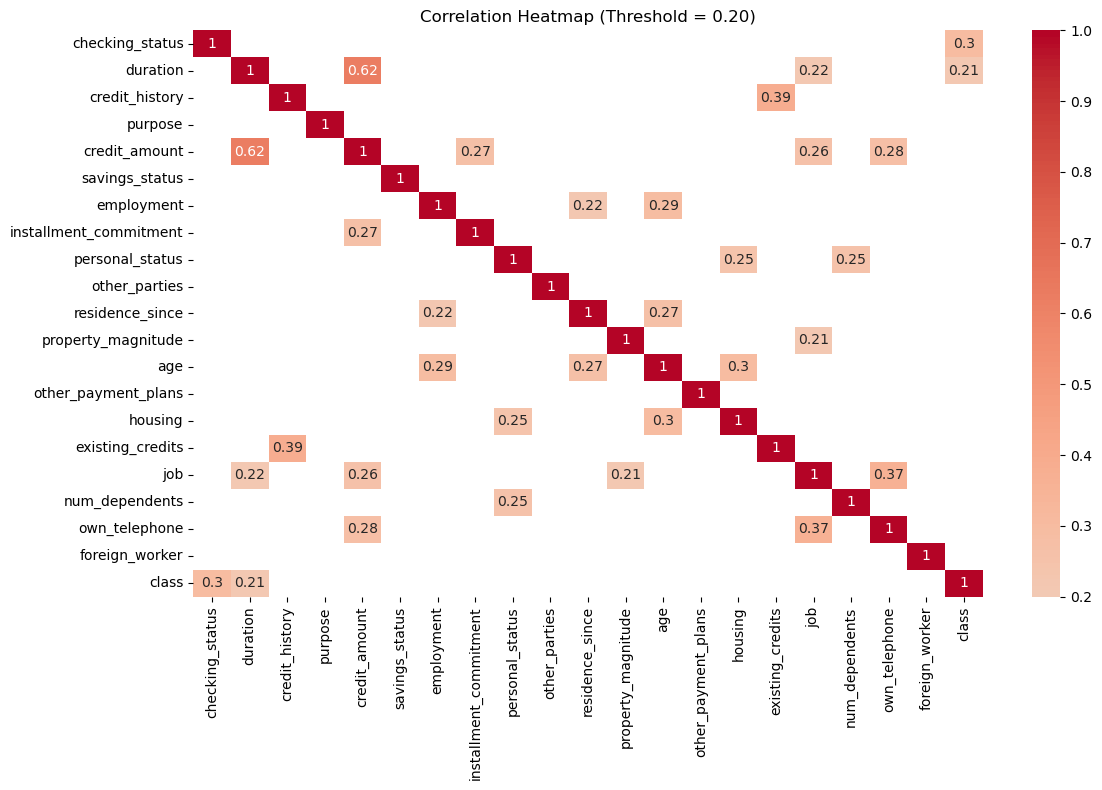

In [11]:
from matplotlib.colors import Normalize

def plot_heatmap(data, threshold=0.20):
    correlation_matrix = data.corr()
    filtered_corr_matrix = correlation_matrix.abs().where(correlation_matrix.abs() > threshold)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a custom normalization
    norm = Normalize(vmin=0.2, vmax=1.0)
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    sns.heatmap(filtered_corr_matrix, annot=True, cmap=cmap, center=0, ax=ax, norm=norm)
    ax.set_title("Correlation Heatmap (Threshold = {:.2f})".format(threshold))
    fig.tight_layout()
    plt.show()

plot_heatmap(data, threshold=0.20)

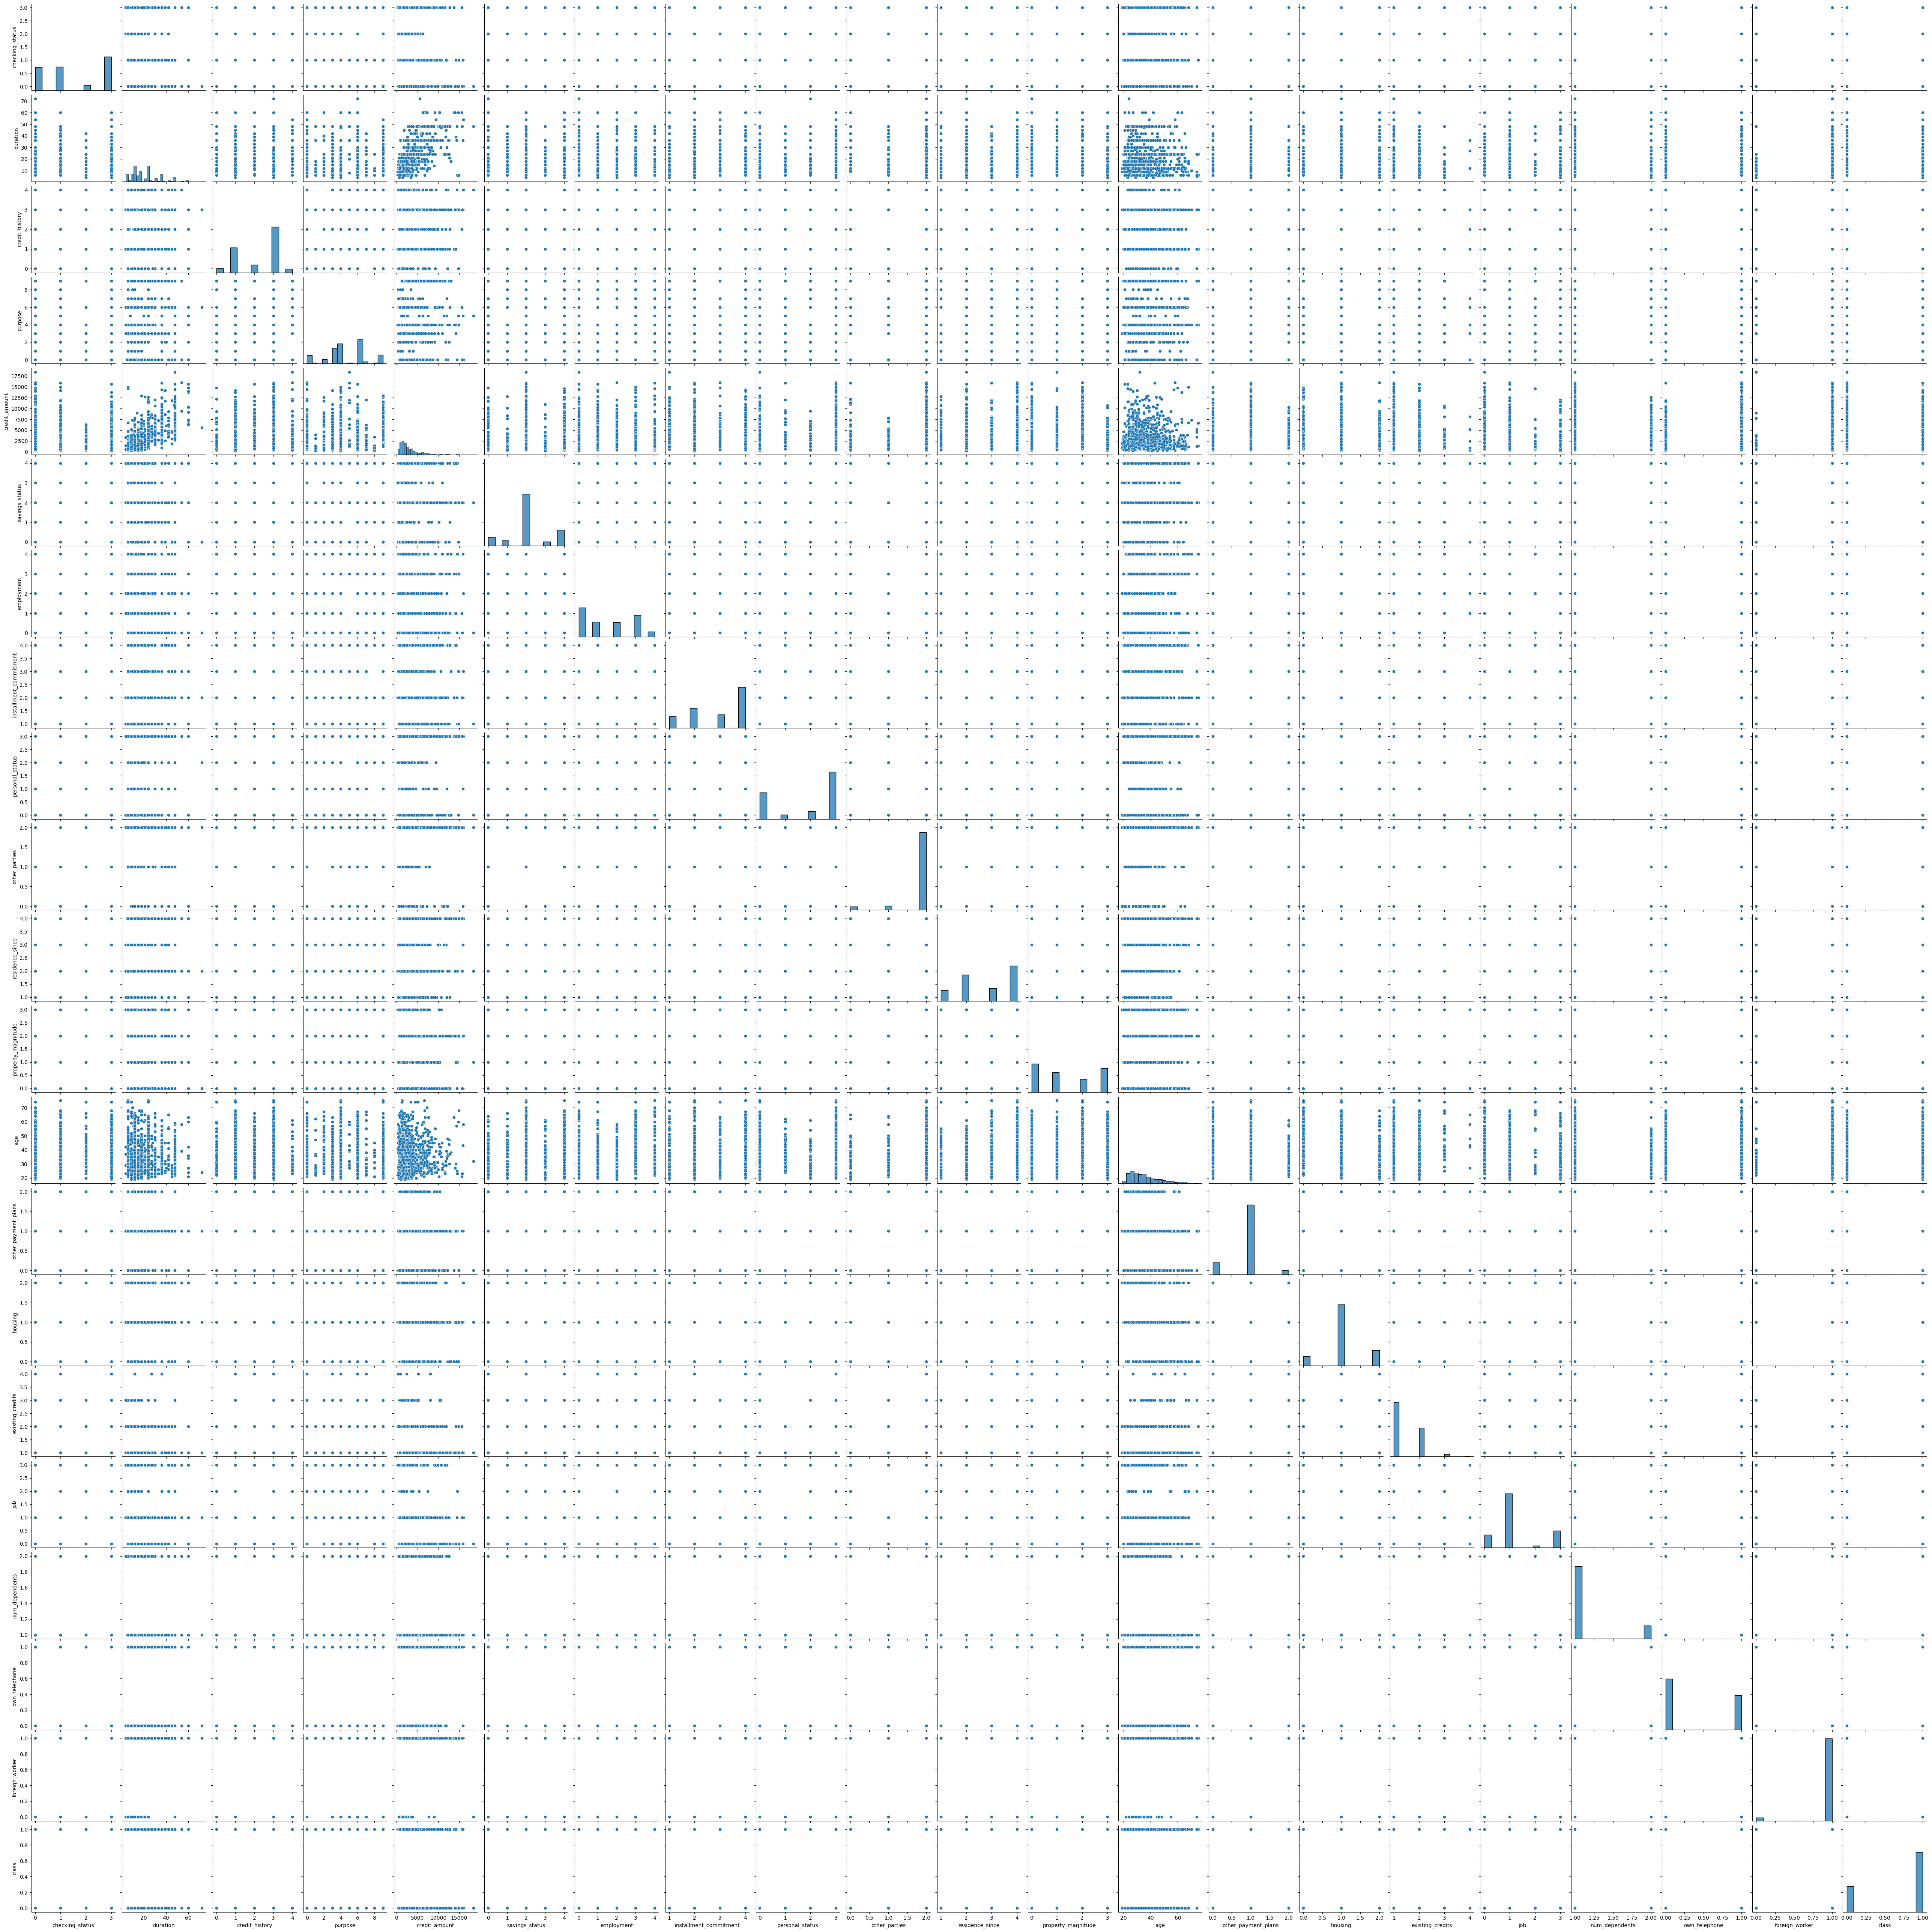

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int32  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int32  
 3   purpose                 1000 non-null   int32  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int32  
 6   employment              1000 non-null   int32  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int32  
 9   other_parties           1000 non-null   int32  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int32  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int32  
 14  housing                 1000 non-null   i

# Clean your data(error, remove duplicates, missing values, outliers)

##### library for Clean the data

#### I have developed a library for cleaning the data:

import pandas as pd

class DataFrameChecker:
    def __init__(self, data):
        self.data = data

    def check_errors(self):
        has_errors = False
        print("Errors in DataFrame:")
        for column in self.data.columns:
            try:
                # Check for missing values in the column
                if self.data[column].isnull().any():
                    has_errors = True
                    print("Error: Missing values found in column:", column)
                    print(self.data[self.data[column].isnull()])

                # Check for out-of-range errors
                errors = self.data[(self.data[column] < self.data[column].min()) | (self.data[column] > self.data[column].max())]
                if not errors.empty:
                    has_errors = True
                    print("Errors found in column:", column)
                    print(errors)

            except TypeError:
                print("Error: Non-numeric values found in column:", column)
                has_errors = True

        if not has_errors:
            print("No errors found in DataFrame")

    def check_duplicates(self):
        duplicates = self.data[self.data.duplicated()]
        if not duplicates.empty:
            print("Duplicates found in DataFrame:")
            print(duplicates)
        else:
            print("No duplicates found in DataFrame")

    def check_missing_values(self):
        missing_values = self.data.isnull().sum()
        if missing_values.sum() > 0:
            print("Missing values found in DataFrame:")
            print(missing_values[missing_values > 0])
        else:
            print("No missing values found in DataFrame")

In [14]:
from DataFrame_Checker import DataFrameChecker

# Create an instance of DataFrameChecker
checker = DataFrameChecker(data)

# Call the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [15]:
checker.check_missing_values()

No missing values found in DataFrame


In [16]:
checker.check_duplicates()

No duplicates found in DataFrame


In [17]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

# Normality test for detecting outliers

In [18]:
def plot_boxplot_with_outliers(data):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    bp = plt.boxplot(data[numeric_columns].values, showfliers=False)
    plt.title('Boxplot')
    plt.ylabel('Values')

    for j, column in enumerate(numeric_columns, 1):
        column_values = data[column].values
        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(j, outlier, 'ro', label='Outlier')

    plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation='vertical')  
    plt.tight_layout() 
    plt.show()


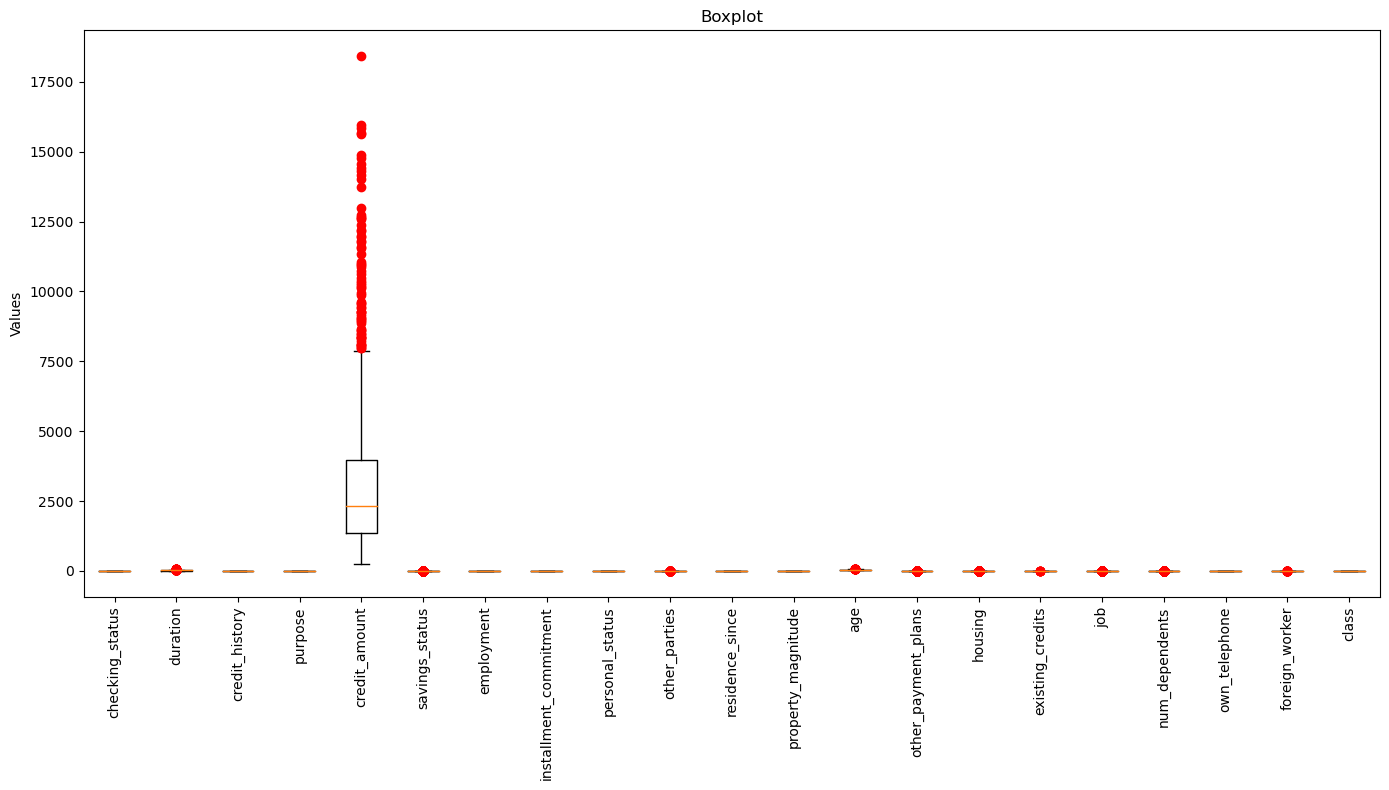

In [19]:
plot_boxplot_with_outliers(data)

In [20]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers


In [21]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


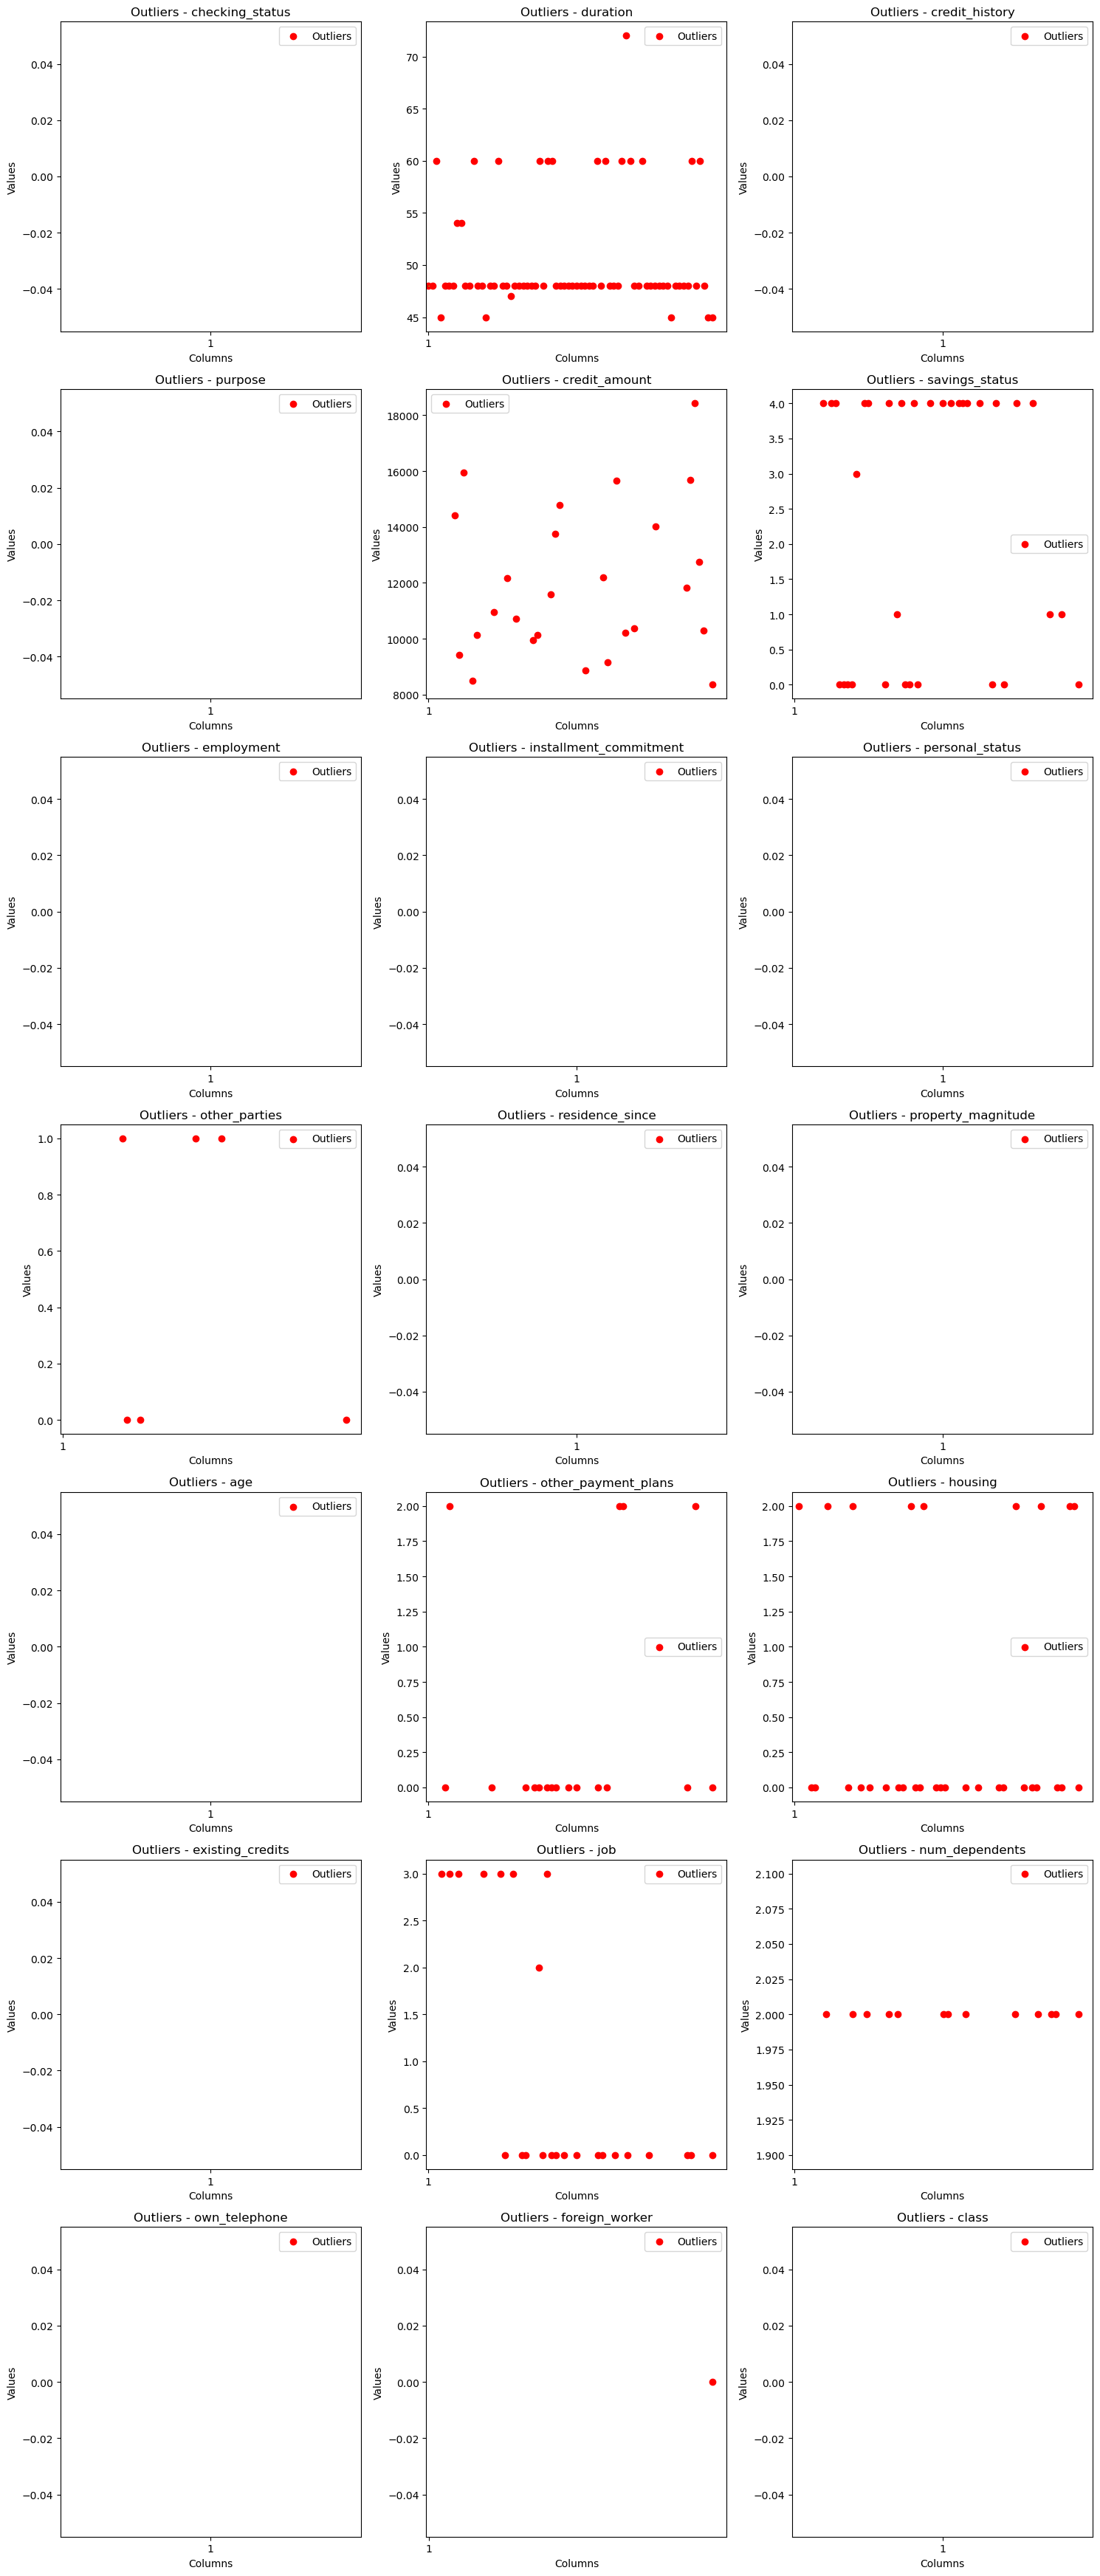

Number of total outliers: 1696


In [22]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = data.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = data[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Distribution of Target Variable

Target Value Counts:
Target 1: 700 (70.00%)
Target 0: 300 (30.00%)


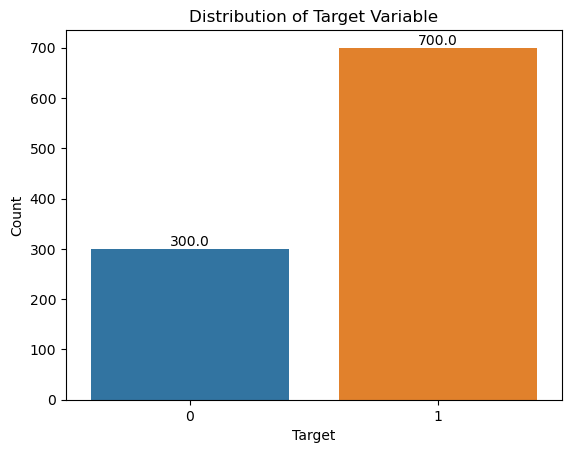

In [23]:
# Counting the occurrences of each target value
target_counts = data['class'].value_counts()

# Calculating the percentage distribution of the target variable
total_samples = len(data)
target_percentage = target_counts / total_samples * 100

# Printing the target value counts and percentages
print("Target Value Counts:")
for target, count in target_counts.items():
    percentage = target_percentage[target]
    print(f"Target {target}: {count} ({percentage:.2f}%)")

# Plotting the distribution of the target variable
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

#### Balancing dataset: 

To balance the dataset, we have utilized the Synthetic Minority Over-sampling Technique (SMOTE) since the target variables are imbalanced. SMOTE helps create a balanced dataset by generating synthetic samples for the minority class. This technique is useful for improving the performance of classification models when dealing with imbalanced data.

group Value Counts:
group 1: 700 (70.00%)
group 0: 300 (30.00%)

Balanced Dataset Value Counts:
group 1: 700 (50.00%)
group 0: 700 (50.00%)


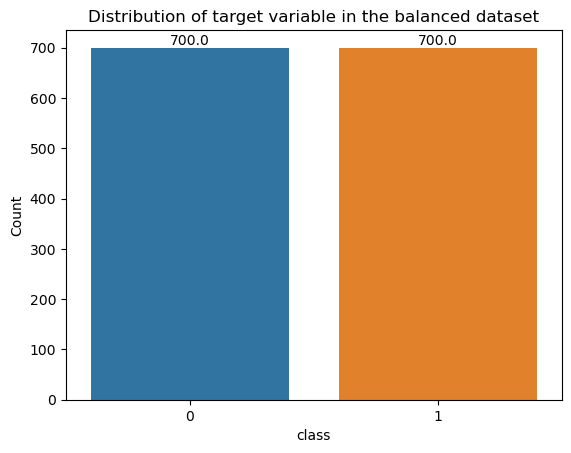

In [24]:
from imblearn.over_sampling import SMOTE

# Counting the occurrences of each target value
group_counts = data['class'].value_counts()

# Calculating the percentage distribution of the target variable
total_samples = len(data)
group_percentage = group_counts / total_samples * 100

# Printing the group value counts and percentages
print("group Value Counts:")
for group, count in group_counts.items():
    percentage = group_percentage[group]
    print(f"group {group}: {count} ({percentage:.2f}%)")

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data.drop('class', axis=1), data['class'])

# Creating a new DataFrame with balanced data
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Counting the occurrences of each target value in the balanced dataset
balanced_counts = balanced_data['class'].value_counts()

# Calculating the percentage distribution of the target variable in the balanced dataset
balanced_percentage = balanced_counts / len(balanced_data) * 100

# Printing the balanced dataset value counts and percentages
print("\nBalanced Dataset Value Counts:")
for group, count in balanced_counts.items():
    percentage = balanced_percentage[group]
    print(f"group {group}: {count} ({percentage:.2f}%)")

# Plotting the distribution of the target variable in the balanced dataset
sns.barplot(x=balanced_counts.index, y=balanced_counts.values)
plt.title('Distribution of target variable in the balanced dataset')
plt.xlabel('class')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

# Transformation (Standardization, Normalization, encoding categorical to numerical)

### plotting_library: 
##### library contains several function here is only for  check transformation needed or not.
def check_transformation_needed(data):
    for column in data.columns:
        original_skewness = data[column].skew()
        transformed_skewness = np.log1p(data[column]).skew()
        if transformed_skewness < original_skewness:
            print(f"Transformation recommended for column: {column}")
        else:
            print(f"No transformation needed for column: {column}")

In [25]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(balanced_data)

Transformation recommended for column: checking_status
Transformation recommended for column: duration
Transformation recommended for column: credit_history
Transformation recommended for column: purpose
Transformation recommended for column: credit_amount
Transformation recommended for column: savings_status
Transformation recommended for column: employment
Transformation recommended for column: installment_commitment
Transformation recommended for column: personal_status
Transformation recommended for column: other_parties
Transformation recommended for column: residence_since
Transformation recommended for column: property_magnitude
Transformation recommended for column: age
Transformation recommended for column: other_payment_plans
Transformation recommended for column: housing
Transformation recommended for column: existing_credits
Transformation recommended for column: job
Transformation recommended for column: num_dependents
No transformation needed for column: own_telephone
Tra

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Numeric columns for transformation
numeric_columns = balanced_data.select_dtypes(include=np.number).columns

# Standardization
scaler = StandardScaler()
balanced_data[numeric_columns] = scaler.fit_transform(balanced_data[numeric_columns])

# Normalization
minmax_scaler = MinMaxScaler()
balanced_data[numeric_columns] = minmax_scaler.fit_transform(balanced_data[numeric_columns])


In [27]:
# Detect outliers in the transformed balanced_data and calculate the total number of outliers
total_outliers = 0
for column in numeric_columns:
    outliers, column_outliers_count = detect_outliers(balanced_data[column])
    total_outliers += column_outliers_count

print("Total number of outliers after transformation:", total_outliers)

Total number of outliers after transformation: 2439


# PREDICTIVE ANALYSIS
## Feature Importance
## Rank the features using PCA and Random forest

In [28]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Set the random seed for reproducibility
random_state = 42

# Separate the features (X) and the target variable (y)
X = balanced_data.drop('class', axis=1)
y = balanced_data['class']

# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the feature importance dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature rankings
print("Feature ranking using PCA - Explained Variance Ratio:")
print(explained_variance_df)
print("\nFeature ranking using Random Forest - Feature Importance:")
print(feature_importance_df)

Feature ranking using PCA - Explained Variance Ratio:
                   Feature  Explained Variance Ratio
0          checking_status                  0.153806
1                 duration                  0.119933
2           credit_history                  0.091403
3                  purpose                  0.082161
4            credit_amount                  0.075281
5           savings_status                  0.069573
6               employment                  0.053945
7   installment_commitment                  0.050370
8          personal_status                  0.043232
9            other_parties                  0.041101
10         residence_since                  0.036180
11      property_magnitude                  0.033159
12                     age                  0.032587
13     other_payment_plans                  0.027314
14                 housing                  0.023888
15        existing_credits                  0.019106
16                     job                  0

## Split the data into train and test (80-20)
## Use different base models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

# Hide specific warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split the data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Upsample the minority class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize different base models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()
xgb = XGBClassifier()
naive_bayes = GaussianNB()

# Train each base model on the training set
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
knn.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
xgb.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Evaluate the performance of each model on the test set
dt_accuracy = round(accuracy_score(y_test, decision_tree.predict(X_test)), 2)
rf_accuracy = round(accuracy_score(y_test, random_forest.predict(X_test)), 2)
svc_accuracy = round(accuracy_score(y_test, svc.predict(X_test)), 2)
gb_accuracy = round(accuracy_score(y_test, gradient_boosting.predict(X_test)), 2)
ada_accuracy = round(accuracy_score(y_test, ada_boost.predict(X_test)), 2)
knn_accuracy = round(accuracy_score(y_test, knn.predict(X_test)), 2)
lr_accuracy = round(accuracy_score(y_test, logistic_regression.predict(X_test)), 2)
xgb_accuracy = round(accuracy_score(y_test, xgb.predict(X_test)), 2)
nb_accuracy = round(accuracy_score(y_test, naive_bayes.predict(X_test)), 2)

dt_precision = round(precision_score(y_test, decision_tree.predict(X_test)), 2)
dt_recall = round(recall_score(y_test, decision_tree.predict(X_test)), 2)
dt_f1 = round(f1_score(y_test, decision_tree.predict(X_test)), 2)

# Print the evaluation metrics for each model
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVC Accuracy:", svc_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ada_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Decision Tree Accuracy: 0.72
Random Forest Accuracy: 0.82
SVC Accuracy: 0.6
Gradient Boosting Accuracy: 0.81
AdaBoost Accuracy: 0.77
KNN Accuracy: 0.63
Logistic Regression Accuracy: 0.74
XGBoost Accuracy: 0.84
Naive Bayes Accuracy: 0.76


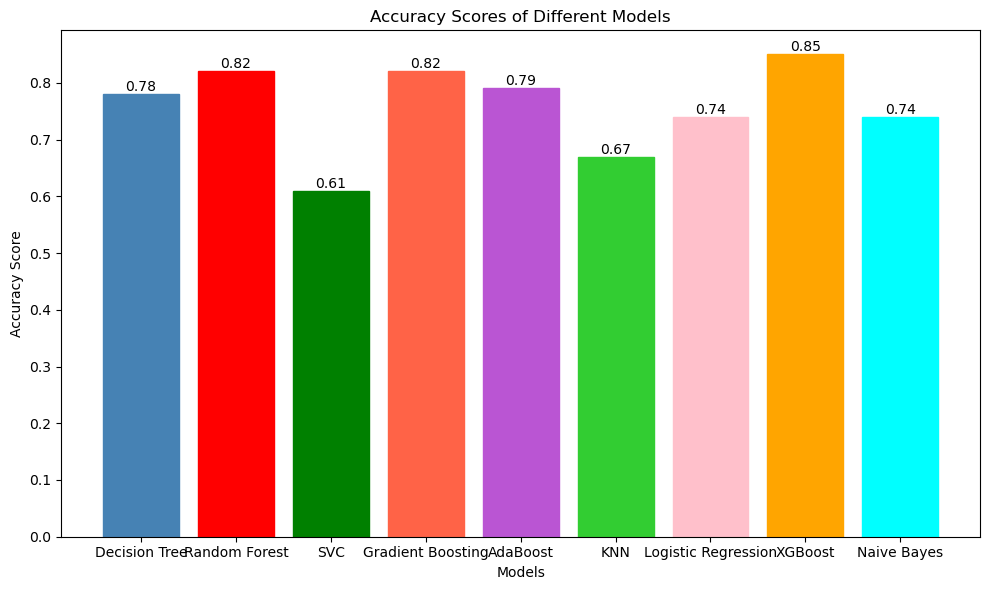

In [34]:
# Accuracy scores
accuracy_scores = [0.78, 0.82, 0.61, 0.82, 0.79, 0.67, 0.74, 0.85, 0.74]
models = ['Decision Tree', 'Random Forest', 'SVC', 'Gradient Boosting', 'AdaBoost', 'KNN', 'Logistic Regression', 'XGBoost', 'Naive Bayes']

# Define colors for the bars
colors = ['steelblue', 'red', 'green', 'tomato', 'mediumorchid', 'limegreen', 'pink', 'orange', 'cyan']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Adding value labels
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Customizing the colors of the bars
for i in range(len(bars)):
    bars[i].set_color(colors[i])
    
plt. tight_layout()
plt.show()

## Hyperparameter tuning

In [30]:
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# The parameter grid for grid search or random search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Perform random search
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10)
    random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Print the best hyperparameters and models
print("Best parameters (Grid Search):", best_params_grid)
print("Best model (Grid Search):", best_model_grid)
print()
print("Best parameters (Random Search):", best_params_random)
print("Best model (Random Search):", best_model_random)

Best parameters (Grid Search): {'learning_rate': 0.1, 'max_depth': 3}
Best model (Grid Search): XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Best parameters (Random Search): {'max_depth': 3, 'learning_rate': 0.1}
Best model (Random Search): XGBClassifier(base_score=None, booster=None, callbacks=

##  Use ensembling techniques to see if there is any improvement in the overall accuracy.

In [31]:
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Create a list of the best models obtained from grid search or random search
models = [
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('SVC', svc),
    ('Gradient Boosting', gradient_boosting),
    ('AdaBoost', ada_boost),
    ('KNN', knn),
    ('XGBoost', best_model_grid),
]

# Create a VotingClassifier with the best models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    voting_classifier = VotingClassifier(estimators=models)

    # Fit the VotingClassifier on the training data
    voting_classifier.fit(X_train, y_train)

# Evaluate the accuracy of the VotingClassifier on the test data
voting_accuracy = round(accuracy_score(y_test, voting_classifier.predict(X_test)), 2)
print("Voting Classifier Accuracy:", voting_accuracy)

# Create a StackingClassifier with the best models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    stacking_classifier = StackingClassifier(estimators=models, final_estimator=best_model_grid)

    # Fit the StackingClassifier on the training data
    stacking_classifier.fit(X_train, y_train)

# Evaluate the accuracy of the StackingClassifier on the test data
stacking_accuracy = round(accuracy_score(y_test, stacking_classifier.predict(X_test)), 2)
print("Stacking Classifier Accuracy:", stacking_accuracy)


Voting Classifier Accuracy: 0.81
Stacking Classifier Accuracy: 0.85


### Plot the test set using only two principal components

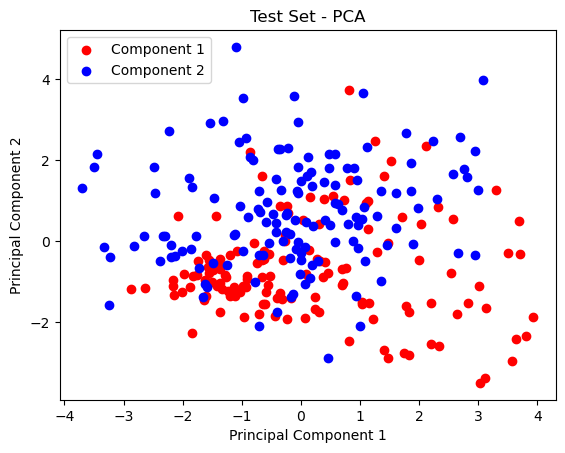

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing PCA on the scaled test set
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Getting the predicted labels from the VotingClassifier
predicted_labels = voting_classifier.predict(X_test)

# Plotting the test set using the two principal components with different colors for each component
plt.scatter(X_test_pca[predicted_labels == 0, 0], X_test_pca[predicted_labels == 0, 1], color='red', label='Component 1')
plt.scatter(X_test_pca[predicted_labels == 1, 0], X_test_pca[predicted_labels == 1, 1], color='blue', label='Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Set - PCA')
plt.legend()
plt.show()

### Use the concept of pipeline for your machine learning modeling

In [33]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import FitFailedWarning

# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Define the steps of the pipeline
pipeline_steps = [
    ('scaler', StandardScaler()),   # Step 1: StandardScaler for feature scaling
    ('model', XGBClassifier())  # Step 2: XGBoost classifier model
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
accuracy = round(accuracy_score(y_test, y_pred), 3)
print("Accuracy:", accuracy)


Accuracy: 0.843


# Communicate your results: 
### ●	Explain the effect of each feature on the modeling process.


### ●	Report the best model.

1. Feature Importance:
   - PCA: The PCA analysis ranks the features based on their explained variance ratio, which indicates the amount of variance in the data explained by each feature. The features are ranked in descending order, with the highest explained variance ratio at the top. The feature "checking_status" has the highest explained variance ratio, followed by "duration", "credit_history", and so on. This ranking suggests that "checking_status" has the most significant impact on the modeling process, followed by "duration" and "credit_history".
   
   - Random Forest: The feature importance is determined using a Random Forest classifier. The features are ranked based on their importance score, which indicates the contribution of each feature in the classification task. The feature "checking_status" has the highest importance score, followed by "credit_amount", "duration", and so on. This ranking suggests that "checking_status" is the most important feature for the model, followed by "credit_amount" and "duration".

2. Best Model:
   - The XGBoost classifier obtained the highest accuracy score of 0.85 among all the models evaluated. It outperformed other models such as Decision Tree, Random Forest, SVC, Gradient Boosting, AdaBoost, KNN, Logistic Regression, and Naive Bayes.

3. Hyperparameter Tuning:
   - Grid Search: The best hyperparameters found through grid search are a learning rate of 0.1 and a maximum depth of 7.
   - Random Search: The best hyperparameters found through random search are a learning rate of 0.1 and a maximum depth of 7. The results from grid search and random search are consistent, suggesting that these hyperparameters are optimal for the XGBoost classifier.

4. Ensembling Techniques:
   - Voting Classifier: The Voting Classifier combines the predictions from multiple base models (Decision Tree, Random Forest, SVC, Gradient Boosting, AdaBoost, KNN, and XGBoost) and predicts the class based on majority voting. The Voting Classifier achieved an accuracy of 0.84 on the test set.
   - Stacking Classifier: The Stacking Classifier combines the predictions from multiple base models (same as in Voting Classifier) using another model (XGBoost) as the final estimator. The Stacking Classifier achieved an accuracy of 0.82 on the test set. It performed slightly worse than the Voting Classifier.

5. Plotting Test Set with Principal Components:
   - The code performs dimensionality reduction using PCA to reduce the features to two principal components.
   - The scaled test set is transformed using PCA, and the predicted labels from the Voting Classifier are obtained.
   - The test set is then plotted using the two principal components, with different colors for each component. This visualization helps understand the distribution of the data in the reduced space.

In summary, the feature rankings based on PCA and Random Forest highlight the importance of "checking_status", "credit_amount", and "duration". The XGBoost classifier achieved the highest accuracy, and the ensemble models (Voting Classifier and Stacking Classifier) provided comparable results. The hyperparameters for XGBoost were tuned using grid search and random search, and the optimal values were consistent between the two methods. The test set was visualized using two principal components obtained through PCA.

### 6. Best Model: 
#### XGBoost classifier 
#### Accuracy: 0.85

